# G2M insight for Cab Investment firm 

##### XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

###### Cab_Data.csv – this file includes details of transaction for 2 cab companies

###### Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

###### Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

###### City.csv – this file contains list of US cities, their population and number of cab users

In [1]:
import pandas as pd

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
customers_data = pd.read_csv('Customer_ID.csv')
city_data = pd.read_csv('City.csv')
transactions_data = pd.read_csv('Transaction_ID.csv')
master_data = pd.read_csv("merged_data.csv")

# Comparing Yellow and pink cabs:
### 1. Which is more popular by customers?
### 2. Which cab company has more overall Users and covers majority of cities?
### 3. Which company has had more profit?
### 4. Which Cab Company has more loyal users?
### 5. Which company has maximum cab users between 2016 - 2018?

# Understanding the data

### Format the date:

In [3]:
from datetime import datetime,timedelta

In [4]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [5]:
master_data['Date of Travel']=master_data['Date of Travel'].apply(lambda x:to_date_format(x))
master_data = master_data.drop(['Unnamed: 0'], axis = 1)

In [6]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [7]:
master_data.shape

(359392, 14)

In [8]:
master_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
dtype: object

In [9]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')

In [10]:
master_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [11]:
master_data.describe().round(2)

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00
mean,10220761.19,22.57,423.44,286.19,19191.65,35.34,15048.82
std,126805.80,12.23,274.38,157.99,21012.41,12.59,7969.41
min,10000011.00,1.90,15.60,19.00,1.00,18.00,2000.00
25%,10110809.75,12.00,206.44,151.20,2705.00,25.00,8424.00
50%,10221035.50,22.44,386.36,282.48,7459.00,33.00,14685.00
75%,10330937.25,32.96,583.66,413.68,36078.00,42.00,21035.00
max,10440107.00,48.00,2048.03,691.20,60000.00,65.00,35000.00


## Relationships across the files

##### Cab data can be merged with transaction data as both have a Transaction ID

In [12]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
transactions_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
merge_transaction1 = pd.merge(cab_data,transactions_data)
merge_transaction1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


##### Customer data can be merged with the merged data formed already as both contain a Customer ID

In [15]:
merge_transaction1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [16]:
customers_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
merge_transaction2 = pd.merge(merge_transaction1,customers_data)
merge_transaction2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


### Finally merge the city data as both contain Cities

In [18]:
final_merge = pd.merge(merge_transaction2,city_data)
final_merge.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


# Clean Data

##### Check for any NaN values or duplicates

In [19]:
master_data.isnull().values.any()

False

In [20]:
master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [21]:
print(master_data.duplicated().sum())

0


###### Change data types for some colums 

In [22]:
master_data["Company"] = master_data["Company"].astype('category')
master_data["City"] = master_data["City"].astype('category')
master_data["Gender"] = master_data["Gender"].astype('category')
master_data["Payment_Mode"] = master_data["Payment_Mode"].astype('category')


In [23]:
print(master_data.dtypes)

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                     category
City                        category
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
dtype: object


In [24]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


## Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 


## Most Popular company:

### Count the most popular Payment method:

[Text(0.5, 1.0, 'Popular Payment mode')]

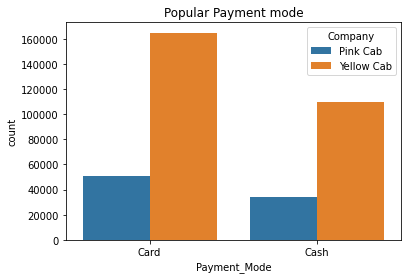

In [26]:
sns.countplot(x='Payment_Mode',hue="Company",data=master_data).set(title='Popular Payment mode') 

### Count most common gender to use each company 

[Text(0.5, 1.0, 'Most Common Gender')]

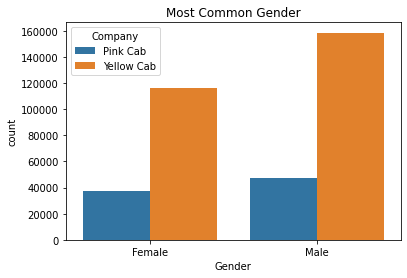

In [27]:
sns.countplot(x='Gender',hue="Company",data=master_data).set(title='Most Common Gender') 

[Text(0.5, 1.0, 'Age of Users')]

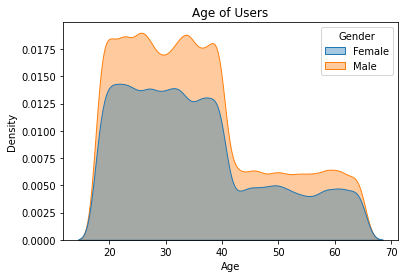

In [28]:
sns.kdeplot(master_data["Age"], shade=True, hue=master_data["Gender"], color="orangered", 
    alpha=0.4).set(title='Age of Users') 

### Calculate how each gender pay for their travel

#### Split data by the companies (pink, yellow)

In [29]:
pink_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_data = master_data[master_data['Company'] == 'Yellow Cab']

In [30]:
pink_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
6,10395626,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
11,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"


In [31]:
yellow_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
8,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"


##### Yellow Cab

[Text(0.5, 1.0, 'Payment Mode Yellow Cab')]

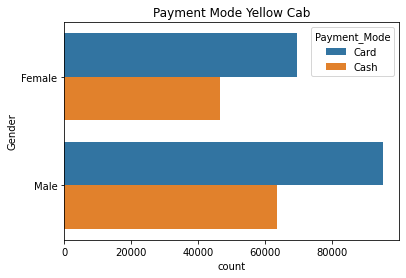

In [32]:
sns.countplot(y='Gender',hue='Payment_Mode',data=yellow_data).set(title='Payment Mode Yellow Cab')   

##### Pink Cab

[Text(0.5, 1.0, 'Payment Mode Pink Cab')]

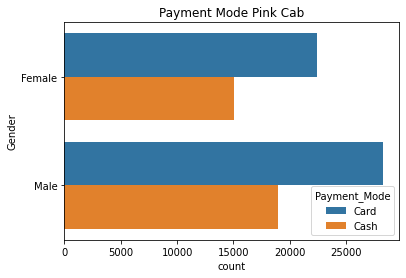

In [33]:
    sns.countplot(y='Gender',hue='Payment_Mode',data=pink_data).set(title='Payment Mode Pink Cab') 

## Calculate which company had more transactions

[Text(0.5, 1.0, 'Most Transactions'), Text(0, 0.5, 'Transaction Count')]

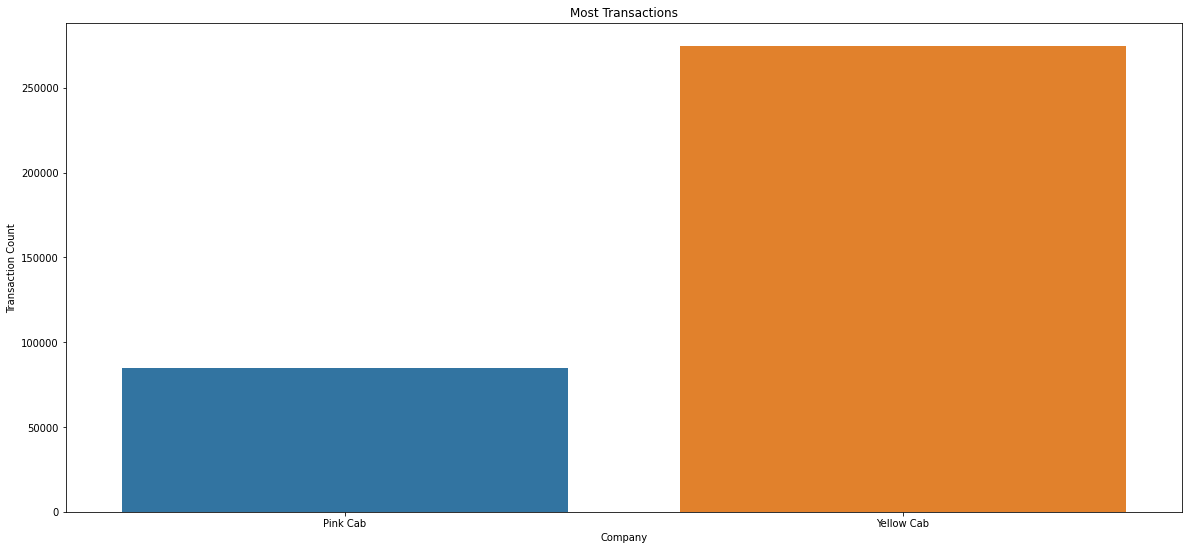

In [34]:
plt.figure(figsize=(20,9))
sns.countplot(x='Company',data=master_data).set(title='Most Transactions',ylabel='Transaction Count')

###### The most Popular Company looks to be the Yellow Cab Company. They are significantly more popular with men between ages of 20 - 40

## Which cab company has more overall Users and covers majority of cities

#### Overall User coverage

[Text(0.5, 1.0, 'User Coverage')]

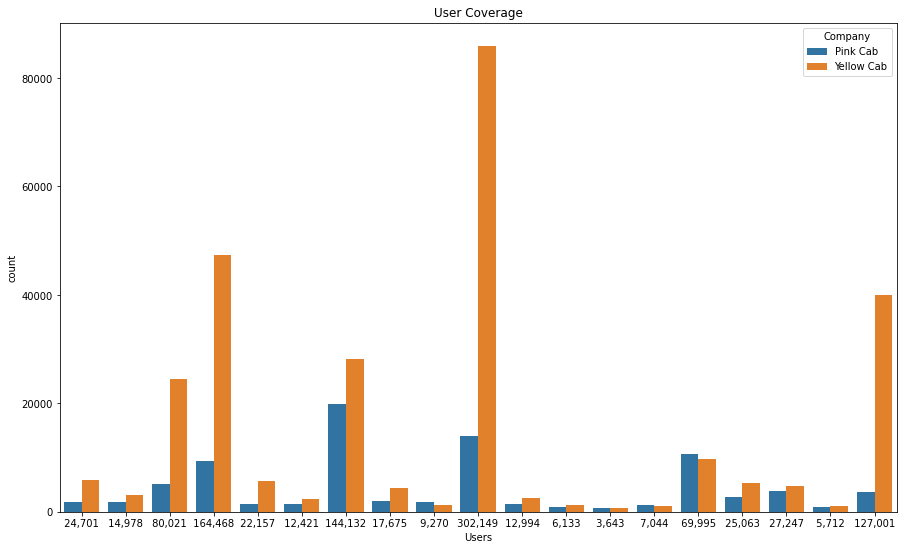

In [35]:
plt.figure(figsize=(15,9))
sns.countplot(x='Users',data=master_data,hue="Company").set(title='User Coverage')

#### City coverage 

[Text(0.5, 1.0, 'City Coverage')]

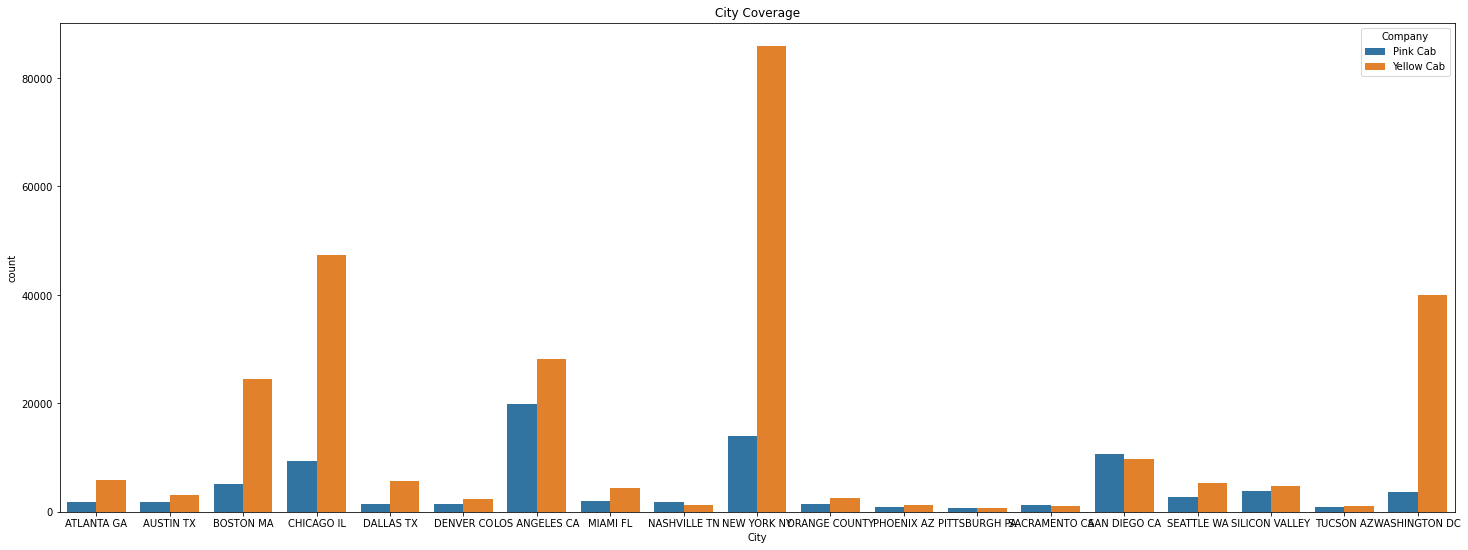

In [36]:
plt.figure(figsize=(25,9))
sns.countplot(x='City',hue="Company",data=master_data).set(title='City Coverage')

###### The Yellow Cab covers majority of cities specifically New York. The yellow cab also has more users overall in majority of cities

## Which company has had more profit?

In [37]:
master_data['Profit'] = master_data["Price Charged"] - master_data["Cost of Trip"]
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808


In [38]:
total_profit = master_data.groupby("Company")['Profit'].sum()
data_frame = pd.DataFrame({'Company':total_profit.index, 'Profit':total_profit.values})
data_frame.loc[:, "Profit"] ='$'+ data_frame["Profit"].map('{:,.0f}'.format)
data_frame.head()

,Company,Profit
0,Pink Cab,"$5,307,328"
1,Yellow Cab,"$44,020,373"


array([<AxesSubplot:ylabel='Profit'>], dtype=object)

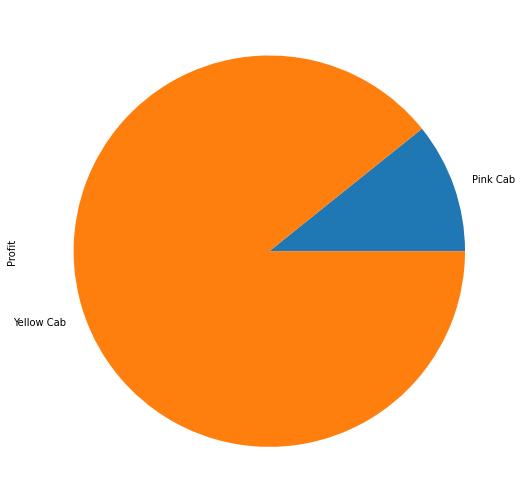

In [39]:
plt.figure(figsize=(20,9))
total_profit.plot.pie(rot=15,subplots=True)

###### the yellow cab has earned more profit than the pink cab by 8.3 times

## Which Cab Company has more loyal users?

In [40]:
loyal_series = master_data.groupby(['Company','Customer ID'])['Gender'].count().reset_index()
loyal_series.columns = ['Company','Customer ID', 'Total Rides']
loyal_users = loyal_series[(loyal_series['Total Rides']) >= 4]
loyal_users.head()

,Company,Customer ID,Total Rides
0,Pink Cab,1,4
1,Pink Cab,2,4
2,Pink Cab,3,6
4,Pink Cab,5,8
5,Pink Cab,6,5


[Text(0.5, 1.0, 'Loyal Customers')]

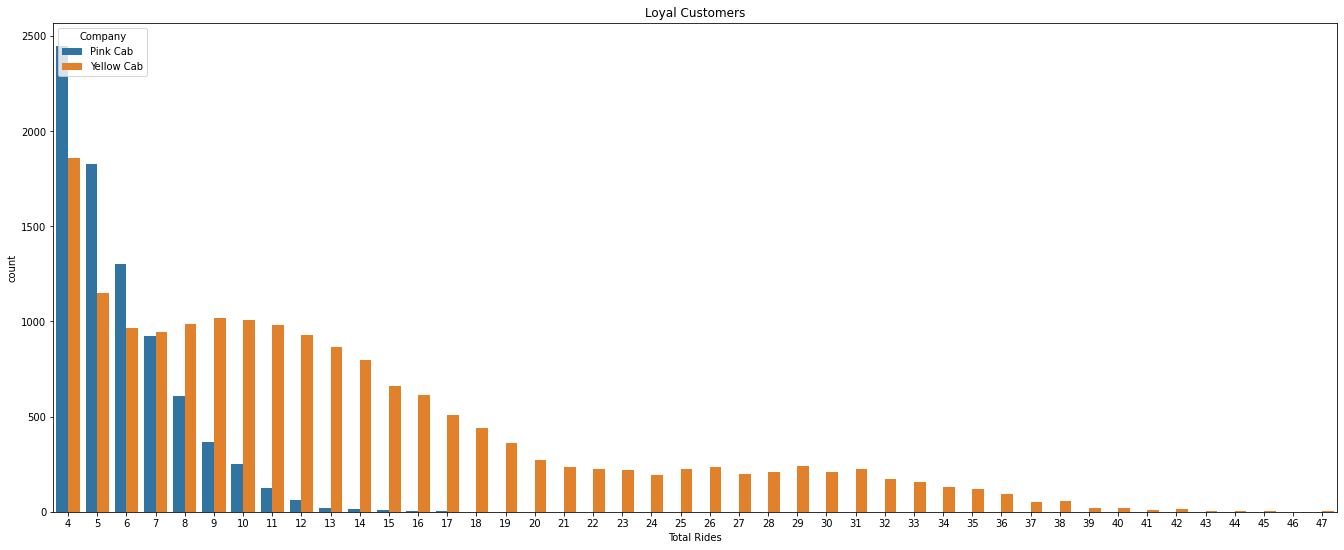

In [41]:
plt.figure(figsize=(23,9))
sns.countplot(x='Total Rides',hue="Company",data=loyal_users).set(title='Loyal Customers')

In [42]:
total_loyal_users = loyal_users.groupby("Company")["Total Rides"].sum().reset_index()
total_loyal_users.head()

,Company,Total Rides
0,Pink Cab,46723
1,Yellow Cab,238613


## Which company has maximum cab users between 2016 - 2018?

In [43]:
total_rides = master_data.groupby(['Company',master_data['Date of Travel'].dt.year])['Customer ID'].count().reset_index()
total_rides.columns = ['Company','Year', 'Total Rides']
total_rides

,Company,Year,Total Rides
0,Pink Cab,2016,25285
1,Pink Cab,2017,30205
2,Pink Cab,2018,29221
3,Yellow Cab,2016,82937
4,Yellow Cab,2017,97759
5,Yellow Cab,2018,93985


[Text(0.5, 1.0, 'Max Cab Users between 2016-2018')]

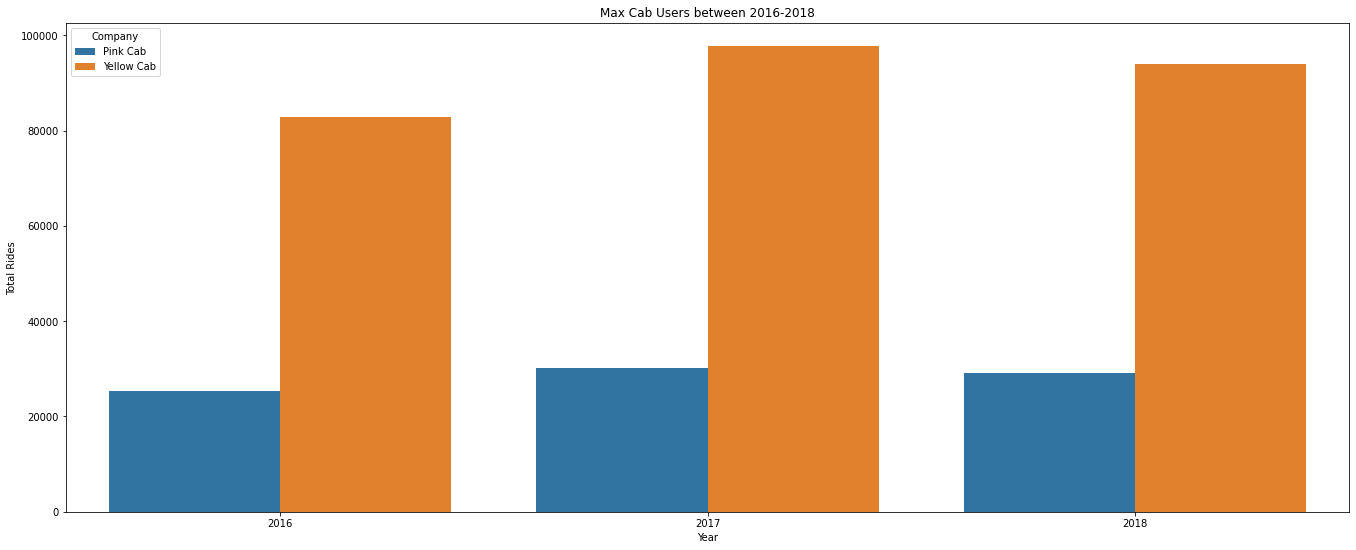

In [44]:
plt.figure(figsize=(23,9))
sns.barplot(x='Year',y='Total Rides',hue="Company",data=total_rides).set(title='Max Cab Users between 2016-2018')

# Recomendation: 

Based on the findings of the analysis. We can confirm that the Yellow Cab company should be invested in because it will generate more profit and have more users in most cities. The Yellow Cab Company has a larger user base than the Pink Cab Company. Yellow Cab has more loyal customers. The Yellow Cab Company provides a broader range of cabs for users to access in various cities. Finally, the Yellow Cab company has seen an increase in users since 2016.